In [1]:
# import scikit learn library to train prediction model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# import dash & plotly library to create user interface
from dash import Dash, dash_table
import dash
import dash_bootstrap_components as dbc
from dash import Input, Output, dcc, html, Dash, State, callback
import plotly.express as px

# import matplotlib, pandas and numpy for ploting, reading and analysing data
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/lowjs/DepressionML/main/cleaned_data2.csv?token=GHSAT0AAAAAABSMAQIVKQNKPVPLAJDYKINSYVKHPUA')

In [3]:
plot_data = pd.read_csv('https://raw.githubusercontent.com/lowjs/DepressionML/main/data_for_plotting.csv?token=GHSAT0AAAAAABSMAQIUKNAC7JKXZK7GSY5EYVKHPSQ')

In [4]:
# initiate a logistic regression model from sklearn
log_reg = LogisticRegression()

In [6]:
# assign x as the features
x = np.array(data.drop("depression", axis=1))

In [7]:
# assign y as the result (depressed or not depressed)
y = data["depression"]

In [8]:
# randomly split 30% of the data as testing data and 70% as training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [9]:
# fit the training data to train the model
log_reg.fit(x_train, y_train)

LogisticRegression()

In [10]:
# test the model
y_pred = log_reg.predict(x_test)

In [12]:
# get the confusion matrix by comparing the expected y and predicted y
cf_m = confusion_matrix(y_test, y_pred)
# print out the confusion matrix
cf_m

array([[9917,   59],
       [ 840,   62]], dtype=int64)

In [12]:
cf_m = metrics.confusion_matrix(y_test, y_pred)
# Assigning columns names
cm_df = pd.DataFrame(cf_m, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix in a table
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,9917,59
Actual Positive,840,62


In [13]:
# generate a report to read the precision, accuracy and scores of the model
cr = classification_report(y_test, y_pred, output_dict = True)
acc = accuracy_score(y_test, y_pred)
cr

{'0': {'precision': 0.9219113135632612,
  'recall': 0.9940858059342422,
  'f1-score': 0.9566391742632518,
  'support': 9976},
 '1': {'precision': 0.512396694214876,
  'recall': 0.06873614190687362,
  'f1-score': 0.12121212121212122,
  'support': 902},
 'accuracy': 0.9173561316418459,
 'macro avg': {'precision': 0.7171540038890686,
  'recall': 0.5314109739205579,
  'f1-score': 0.5389256477376865,
  'support': 10878},
 'weighted avg': {'precision': 0.8879545028763479,
  'recall': 0.9173561316418459,
  'f1-score': 0.8873658517910953,
  'support': 10878}}

In [14]:
# calculate the sensitivity and specificity of the prediction result
res = []
for l in [0,1]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test)==l,
                                                      np.array(y_pred)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
ss = pd.DataFrame(res,columns = ['class','sensitivity','specificity'])
ss

,class,sensitivity,specificity
0,0,0.068736,0.994086
1,1,0.994086,0.068736


roc_auc_score for DecisionTree:  0.6211694652531929


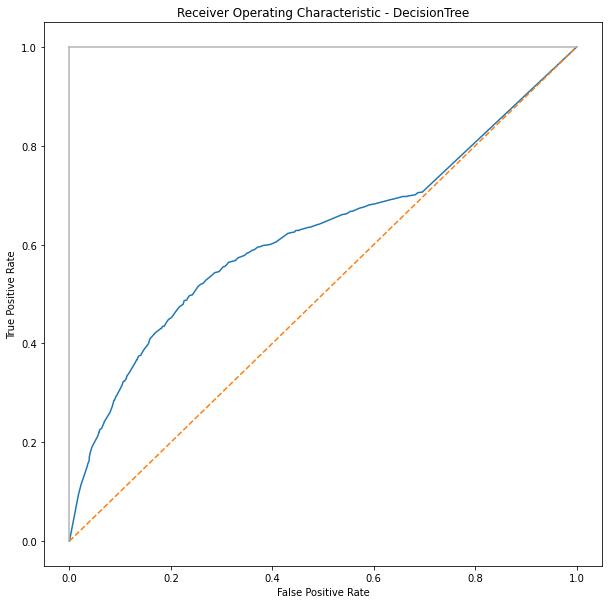

roc_auc_score for Logistic Regression:  0.7768330801017787


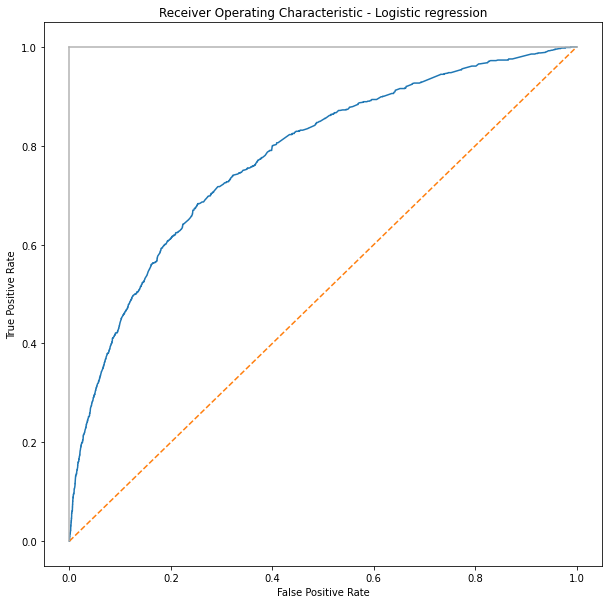

In [15]:
# Calculate Receiver Operating Characteristic for Decision Tree
clf_tree = DecisionTreeClassifier();
clf_tree.fit(x_train, y_train);
y_score1 = clf_tree.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

# Plot Receiver Operating Characteristic for Decision Tree
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Calculate Receiver Operating Characteristic for Decision Tree
y_score2 = log_reg.predict_proba(x_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

# Plot Receiver Operating Characteristic for Decision Tree
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
# Display the summary for all the features in the dataset
plot_data.describe()

,gender,pregnant,age,household_income,anemia,arthritis,heart_disease,stroke,emphysema,bronchitis,time_in_current_job,insomnia,sleep_hours,healthy_lifestyle,alcohol_consumption,disabled,current_smoker,current_cigarettes_per_day,depression,over_18
count,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36255.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.0
mean,0.508756,0.018092,47.786260,6.919358,0.042196,0.259136,0.080118,0.035412,0.019471,0.056069,49.136159,0.248656,7.071830,0.503710,330.840812,0.239416,0.426653,2.425770,0.087371,1.0
std,0.499930,0.133286,18.763978,3.523153,0.201040,0.438166,0.271480,0.184821,0.138175,0.230058,92.282125,0.432240,1.570525,0.499993,201.395358,0.426733,0.494598,6.641724,0.282382,0.0
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,31.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,47.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,7.000000,1.000000,300.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1.000000,0.000000,63.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,8.000000,1.000000,480.000000,0.000000,1.000000,0.000000,0.000000,1.0
max,1.000000,1.000000,85.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,720.000000,1.000000,14.500000,1.000000,1320.000000,1.000000,1.000000,95.000000,1.000000,1.0


In [19]:
# Display the structure for all the features in the dataset
plot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36259 entries, 0 to 36258
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      36259 non-null  int64  
 1   pregnant                    36259 non-null  int64  
 2   age                         36259 non-null  int64  
 3   household_income            36259 non-null  int64  
 4   anemia                      36259 non-null  int64  
 5   arthritis                   36259 non-null  int64  
 6   heart_disease               36259 non-null  int64  
 7   stroke                      36259 non-null  int64  
 8   emphysema                   36259 non-null  int64  
 9   bronchitis                  36259 non-null  int64  
 10  time_in_current_job         36259 non-null  int64  
 11  insomnia                    36259 non-null  int64  
 12  sleep_hours                 36259 non-null  float64
 13  healthy_lifestyle           362

In [17]:
# obtain the summaries for some features in string format for displaying purpose
gender_arr = str(plot_data['gender'].describe()).split("\n")[0:8]
pregnant_arr = str(plot_data['pregnant'].describe()).split("\n")[0:8]
age_arr = str(plot_data['age'].describe()).split("\n")[0:8]
household_income_arr = str(plot_data['household_income'].describe()).split("\n")[0:8]
sleep_hours_arr = str(plot_data['sleep_hours'].describe()).split("\n")[0:8]
depression_arr = str(plot_data['depression'].describe()).split("\n")[0:8]

In [34]:
# initialise a variable for the result globally
user_out = 0
user_out_prob = 0
advice = ''

# create an app interface using dash
app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP, 'https://codepen.io/chriddyp/pen/bWLwgP.css'])

# the style arguments for the sidebar. We use position:fixed and a fixed width
SIDEBAR_STYLE = {
    "position": "fixed",
    "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "25rem",
    "padding": "3rem 3rem",
    "background-color": "#f3f3f3",
}

# the styles for the main content position it to the right of the sidebar and
# add some padding.
CONTENT_STYLE = {
    "margin-left": "27rem",
    "margin-right": "2rem",
    "padding": "2rem 1rem",
}

# create a sidebar for navigation
sidebar = html.Div(
    [
        html.H2("Depression Predictor", className="display-4"),
        html.Hr(),
        html.P(
            "Navigation Panel", className="lead"
        ),
        html.Br(),
        dbc.Nav(
            [
                dbc.NavLink("Home", href="/", active="exact"),
                dbc.NavLink("User Input", href="/page-1", active="exact"),
                dbc.NavLink("Prediction Model", href="/page-2", active="exact"),
                dbc.NavLink("Summary & Structure", href="/page-3", active="exact"),
                dbc.NavLink("Exploratory Data Analysis", href="/page-4", active="exact"),
                dbc.NavLink("Feature Selection", href="/page-5", active="exact")
                
            ],
            vertical=True,
            pills=True,
           
            
        ),
    ],
    style=SIDEBAR_STYLE,
)

content = html.Div(id="page-content", style=CONTENT_STYLE)

app.layout = html.Div([
    dcc.Location(id="url"), sidebar, content
])

# ploting confusion matrix
import plotly.graph_objects as go
z = [[cf_m[0][0], cf_m[0][1]], [cf_m[1][0], cf_m[1][1]]]
fig_confuse = px.imshow(z, text_auto = True, aspect="auto")

fig_confuse.show()

x_axis = ['Depressed', 'Not Depressed']

depressed_individual = len(plot_data[plot_data['depression']==1])
not_depressed_individual = len(plot_data[plot_data['depression']==0])

fig_bar = go.Figure([go.Bar(x=x_axis, y=[depressed_individual, not_depressed_individual])])
fig_bar.show()

# ploting graph for relationship between gender and depression
import plotly.figure_factory as ff

male_depressed = len(plot_data[(plot_data['gender']==0) & (plot_data['depression']==1)])
male_not_depressed = len(plot_data[(plot_data['gender']==0) & (plot_data['depression']==0)])
female_depressed = len(plot_data[(plot_data['gender']==1) & (plot_data['depression']==1)])
female_not_depressed = len(plot_data[(plot_data['gender']==1) & (plot_data['depression']==0)])

fig_heat = go.Figure(data=ff.create_annotated_heatmap(
                    z=[[male_depressed, male_not_depressed],
                          [female_depressed, male_not_depressed]],
                    x=['Depressed', 'Not Depressed'],
                    y=['Male', 'Female'],
                    annotation_text=[[male_depressed, male_not_depressed],
                      [female_depressed, female_not_depressed]],
                    texttemplate="%{text}",
                    textfont={"size":10}
))

fig_heat.show()

# ploting total number of individul involved based on gender and gender
import plotly.express as px

depressed_row = plot_data[plot_data['depression']==1]

fig_hist = px.histogram(depressed_row, x='age', color='gender')
newnames = {'0':'Male', '1': 'Female'}
fig_hist.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig_hist.show()

# ploting number of individual with different ages in the dataset
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

age_row = plot_data['age']

fig_box = go.Figure()
fig_box.add_trace(go.Box(y=age_row, name='Ages',
                marker_color = 'indianred'))
fig_box.show()


# ploting ROC for decision tree

roc_score1 = roc_auc_score(y_test, y_score1)

roc_plot1 = go.Figure()
df = pd.DataFrame({'false_positive_rate1': false_positive_rate1, 'true_positive_rate1': true_positive_rate1}, columns=['false_positive_rate1', 'true_positive_rate1'])
roc_plot1.add_trace(go.Scatter(
                    x=[0, 1],
                    y=[0, 1],
                    line = dict(shape = 'linear',
                                color = 'yellow',
                                width= 2,
                                dash = 'dash'),
                   )
                  )
roc_plot1.add_trace(go.Scatter(
                    x=false_positive_rate1,
                    y=true_positive_rate1
                   )
                  )
roc_plot1.update_layout(
    title="Receiver Operating Characteristic - DecisionTree",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
)

roc_plot1.show()

# ploting ROC for logistic regression

roc_score2 = roc_auc_score(y_test, y_score2)

roc_plot2 = go.Figure()
df = pd.DataFrame({'false_positive_rate2': false_positive_rate2, 'true_positive_rate2': true_positive_rate2}, columns=['false_positive_rate2', 'true_positive_rate2'])
roc_plot2.add_trace(go.Scatter(
                    x=[0, 1],
                    y=[0, 1],
                    line = dict(shape = 'linear',
                                color = 'yellow',
                                width= 2,
                                dash = 'dash'),
                   )
                  )
roc_plot2.add_trace(go.Scatter(
                    x=false_positive_rate2,
                    y=true_positive_rate2
                   )
                  )
roc_plot2.update_layout(
    title="Receiver Operating Characteristic - Logistic regression",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
)

roc_plot2.show()

# ploting histogram for the distribution of household income in the dataset

hh_row = plot_data['household_income']
fig_feature1 = px.histogram(hh_row, x='household_income', labels=dict(household_income="Household Income (k)"))
fig_feature1.update_layout(bargap=0.1)
fig_feature1.show()

# ploting histogram for the number of different gender in the dataset

gender_row = plot_data['gender']
gender_fig = px.histogram(gender_row, x='gender', labels=dict(gender_row="Gender"), color_discrete_sequence=['indianred'])
gender_fig.update_layout(bargap=0.2)

gender_fig.show()

# ploting the distribution of sleeping hours of the individual in the dataset

sleep_hours_row = plot_data['sleep_hours']
sleep_hours_fig = px.histogram(sleep_hours_row, x='sleep_hours', labels=dict(sleep_hours="Sleeping Hours"), nbins=15)
sleep_hours_fig.update_layout(bargap=0.1)
sleep_hours_fig.show()

# initialise a global list to collect user input

user_input = list()

@app.callback(Output("page-content", "children"), [Input("url", "pathname")])

# here is the code to render the page

def render_page_content(pathname):
    if pathname == "/":
        return html.Div([
            
            html.H4('Introduction'),
            html.H6('Greetings! This is a Depression Predictor developed by Chen Ching Yen, Low Jin Seng, Jasmine Chong See Yan, Janice Chong See Wai and Leonardo Laiherman.'),
            html.Br(),
            html.H4('User Input'),
            html.H6("Users are required to select YES or No for each question. The questions are the features that we have selected from our dataset obtained. Refer to Feature Selection tabset."),
            html.H6('Please click on the submit button to view your results.'),
            html.Br(),
            html.H4('Results'),
            html.H6('To see your probability of getting depression, please head over to the Results tab panel.'),
            html.H6('If you wish to see the summary, structure, exploratory data analysis and feature selection of our dataset, please click the tab panel accordingly.'),
            html.Br(),
            html.H4('Summary & Structure'),
            html.H6('Summary will give you the Mininum, 1st Quartile, Median, Mean, 3rd Quartile and the Maximum values for each attribute of the dataset.'),
            html.H6('Structure will give you the number of observations, number of variables(attributes) and data type for each attribute of the dataset.'),
            html.Br(),
            html.H4('Exploratory Data Analysis'),
            html.H6('In this tab, you will be able to see a few visualization plots.'),
            html.H6('The 1st plot is a Heat Map of all our attributes in our dataset.'),
            html.H6('The 2nd plot is a Bar Chart that shows the number of people getting and not getting depression in our dataset.'),
            html.H6('The 3rd plot is a Scatter Plot which shows attribute means for the people getting depression against who does not.'),
            html.H6('The 4th plot is a Scatter Plot which shows the difference in attribute means for the people getting depression against who does not.'),
            html.Br(),
            html.H4('Feature Selection'),
            html.H6('In this tabset, you will be able to view the Initial & Finalized Feature Selection.'),
            html.H6('We have selected the top 10 most significant factors causing depression based on the box plot for each attribute in our dataset.'),
            html.H6('Question 1 : Gender'),
            html.H6('Question 2 : Pregnant'),
            html.H6('Question 3 : Age'),
            html.H6('Question 4 : Financially Stable'),
            html.H6('Question 5 : Health Issue(s)'),
            html.H6('Question 6 : Fatigue Regularly'),
            html.H6('Question 7 : Healthy Lifestyle'),
            html.H6('Question 8 : Alcohol Consumption'),
            html.H6('Question 9 : Disabled'),
            html.H6('Question 10: Smoker'),
            html.Br(),
            html.H4('Prediction Model'),
            html.H6('The 1st part is Prediction.'),
            html.H6('The 2nd part is Confusion Matrix.'),
            html.H6('The 3rd part is Sensitivity Rate.'),
            html.H6('The 4th part is Specificity Rate.'),
            html.H6('The 5th part is Total Misclassification Error Rate.'),
            html.H6('The 6th part is Receiver Operating Characteristic(ROC) curve.')
        ])
    
#     page 1 which collect user input

    elif pathname == "/page-1":
        return html.Div([
            html.H4('User Input'),
            html.Br(),
            
            html.Label('Gender'),
        dcc.RadioItems(
            id = 'gender',
            options=[{'label': 'Male', 'value': 1},
                     {'label': 'Female', 'value': 0}],
            value = 1
        ),
        
        html.Br(),
        html.Label('Pregnant'),
        dcc.RadioItems(
            id = 'pregnant',
            options=[{'label': 'Yes', 'value': 1},
                     {'label': 'No', 'value': 0}],
            value = 0
        ),
        
        html.Br(),
        html.Label('Age'),
        dcc.Input(
            id='input_age',
            value = 20
        ),
        html.Div(id='textarea-example-output', style={'whiteSpace': 'pre-line'}),
        
        html.Br(),
        html.Label('Financially Stable'),
        dcc.RadioItems(
            id = 'financially_stable',
            options=[{'label': 'Yes', 'value': 0},
                     {'label': 'No', 'value': 1}],
            value = 0
        ),
        
        html.Br(),
        html.Label('Anemia'), #checkboxes
        dcc.RadioItems(
            id = 'anemia',
            options=[{'label': 'Yes', 'value': 1},
                     {'label': 'No', 'value': 0}],
            value = 0
        ),
        
        html.Br(),
        html.Label('Arthritis'), #checkboxes
        dcc.RadioItems(
            id = 'arthritis',
            options=[{'label': 'Yes', 'value': 1},
                     {'label': 'No', 'value': 0}],
            value = 0
        ),
            
        html.Br(),
        html.Label('Heart Disease'), #checkboxes
        dcc.RadioItems(
            id = 'heart_disease',
            options=[{'label': 'Yes', 'value': 1},
                     {'label': 'No', 'value': 0}],
            value = 0
        ),
            
        html.Br(),
        html.Label('Stroke'), #checkboxes
        dcc.RadioItems(
            id = 'stroke',
            options=[{'label': 'Yes', 'value': 1},
                     {'label': 'No', 'value': 0}],
            value = 0
        ),
            
        html.Br(),
        html.Label('Emphysema'), #checkboxes
        dcc.RadioItems(
            id = 'emphysema',
            options=[{'label': 'Yes', 'value': 1},
                     {'label': 'No', 'value': 0}],
            value = 0
        ),
            
        html.Br(),
        html.Label('Bronchitis'), #checkboxes
        dcc.RadioItems(
            id = 'bronchitis',
            options=[{'label': 'Yes', 'value': 1},
                     {'label': 'No', 'value': 0}],
            value = 0
        ),
            
        html.Br(),
        html.Label('Insomnia'),
        dcc.RadioItems(
            id = 'insomnia',
            options=[{'label': 'Yes', 'value': 1},
                     {'label': 'No', 'value': 0}],
            value = 0
        ),
            
        html.Br(),
        html.Label('Fatigue Regularly'),
        dcc.RadioItems(
            id = 'fatigue',
            options=[{'label': 'Yes', 'value': 1},
                     {'label': 'No', 'value': 0}],
            value = 0
        ),
        
        html.Br(),
        html.Label('Healthy Lifestyle'),
        dcc.RadioItems(
            id = 'healthy_lifestyle',
            options=[{'label': 'Yes', 'value': 0},
                     {'label': 'No', 'value': 1}],
            value = 0
        ),
        
        html.Br(),
        html.Label('Alcohol Consumption'), #checkboxes
        dcc.RadioItems(
            id = 'alcohol_consumption',
            options=[{'label': 'Yes', 'value': 1},
                     {'label': 'No', 'value': 0}],
            value = 0
        ),
        
        html.Br(),
        html.Label('Disabled'),
        dcc.RadioItems(
            id = 'disabled',
            options=[{'label': 'Yes', 'value': 1},
                     {'label': 'No', 'value': 0}],
            value = 0
        ),
        
        html.Br(),
        html.Label('Smoker'),
        dcc.RadioItems( 
            id = 'smoker',
            options=[{'label': 'Heavy Smoker', 'value': 2},
                     {'label': 'Light Smoker', 'value': 1},
                     {'label': 'Non-smoker', 'value': 0}],
            value = 0
        ),
        
        html.Br(),
        html.Button('Submit', id='submit-btn'),
            
        html.Br(),    
        html.Br(),
        html.H4('Result'),
        html.Div(id='outputs')
            
        ])
    
#     page 2 to display the prediction result such as probability, accuracy, confusion matrix, sensitivity and specificity and ROC result
    elif pathname == "/page-2":
        return html.Div ([
            html.H4('Prediction'),
            html.H6('Your depression probability is : '),
            # output probability
            html.H6(user_out_prob[0][1]),
            html.Br(),
            # giving advice accordingly
            html.H4('Advice :'),
            html.H6(advice),
            html.Div(id='my-div'),
            html.Br(),
            html.H4('Model Accuracy : '),
            html.H6(acc),
            html.Br(),
            html.H4('Confusion Matrix : '),
            dcc.Graph(
                figure = fig_confuse
            ),
            html.Br(),
            html.H4('Sensitivity Rate'),
            html.H6(f"{ss['class'][0]} : {ss['sensitivity'][0]}"),
            html.H6(f"{ss['class'][1]} : {ss['sensitivity'][1]}"),
            html.Br(),
            html.H4('Specificity Rate'),
            html.H6(f"{ss['class'][0]} : {ss['specificity'][0]}"),
            html.H6(f"{ss['class'][1]} : {ss['specificity'][1]}"),
            html.Br(),
            html.H4('Total Misclassification Error Rate : '),
            html.H6(1-acc),
            html.Br(),
            html.H4('Receiver Operating Characteristic (ROC) curve'),
            html.H6(f'ROC Ares Under Curve Score for DecisionTree: {roc_score1}'),
            dcc.Graph(
                figure = roc_plot1
            ),
            html.H6(f'ROC Ares Under Curve Score for Logistic Regression: {roc_score2}') ,
            dcc.Graph(
                figure = roc_plot2
            ),
        ])

#     page 3 is used to display the summary of our features such as mode, median, mean, max, min, first quartile and third quartile        
    elif pathname == "/page-3":
        return html.Div([
            html.H2('Summary of the Probability of Getting Depression.'),
            html.Br(),
            html.H4('Gender'),
            html.P(gender_arr[0]),
            html.P(gender_arr[1]),
            html.P(gender_arr[2]),
            html.P(gender_arr[3]),
            html.P(gender_arr[4]),
            html.P(gender_arr[5]),
            html.P(gender_arr[6]),
            html.P(gender_arr[7]),
            html.Br(),
            html.H4('Pregnant'),
            html.P(pregnant_arr[0]),
            html.P(pregnant_arr[1]),
            html.P(pregnant_arr[2]),
            html.P(pregnant_arr[3]),
            html.P(pregnant_arr[4]),
            html.P(pregnant_arr[5]),
            html.P(pregnant_arr[6]),
            html.P(pregnant_arr[7]),
            html.Br(),
            html.H4('Age'),
            html.P(age_arr[0]),
            html.P(age_arr[1]),
            html.P(age_arr[2]),
            html.P(age_arr[3]),
            html.P(age_arr[4]),
            html.P(age_arr[5]),
            html.P(age_arr[6]),
            html.P(age_arr[7]),
            html.Br(),
            html.H4('Household Income'),
            html.P(household_income_arr[0]),
            html.P(household_income_arr[1]),
            html.P(household_income_arr[2]),
            html.P(household_income_arr[3]),
            html.P(household_income_arr[4]),
            html.P(household_income_arr[5]),
            html.P(household_income_arr[6]),
            html.P(household_income_arr[7]),
            html.Br(),
            html.H4('Sleeping Hours'),
            html.P(sleep_hours_arr[0]),
            html.P(sleep_hours_arr[1]),
            html.P(sleep_hours_arr[2]),
            html.P(sleep_hours_arr[3]),
            html.P(sleep_hours_arr[4]),
            html.P(sleep_hours_arr[5]),
            html.P(sleep_hours_arr[6]),
            html.P(sleep_hours_arr[7]),
            html.Br(),
            html.H4('Depression'),
            html.P(depression_arr[0]),
            html.P(depression_arr[1]),
            html.P(depression_arr[2]),
            html.P(depression_arr[3]),
            html.P(depression_arr[4]),
            html.P(depression_arr[5]),
            html.P(depression_arr[6]),
            html.P(depression_arr[7]),
        ])
    
#     page 4 is used to display some relationship between features to do Exploratory Data Analysis (EDA)
    elif pathname == "/page-4":
        return html.Div([
            html.H2("Exploratory Data Analysis"),
            html.H6("Charts below are the visualisations of our dataset"),
            html.Br(),
            html.H4("Number of depressed individual"),
            dcc.Graph(
                figure = fig_bar
            ),
            html.H4('Gender and Depression'),
            dcc.Graph(
                figure = fig_heat
            ),
            html.H4('Ages of Depressed Individuals by Gender'),
            dcc.Graph(
                figure = fig_hist
            ),
            
        ])
    
#     page 5 is built for the feature selection to display an overview of the range and distribution of the dataset we are using
    elif pathname == "/page-5":
        return html.Div([
            html.H4('Ages Distribution of Dataset'),
            dcc.Graph(
                figure = fig_box
            ),
            html.H4('Gender'),
            dcc.Graph(
                figure = gender_fig
            ),
            html.H4('Sleeping Hours'),
            dcc.Graph(
                figure = sleep_hours_fig
            ),
            html.H6('Household Income'),
            dcc.Graph(
                figure = fig_feature1
            ),
        ])
        
#     If the user tries to reach a different page, return a 404 message
    return dbc.Jumbotron(
        [
            html.H1("404: Not found", className="text-danger"),
            html.Hr(),
            html.P(f"The pathname {pathname} was not recognised..."),
        ]
    )

@app.callback(
    Output('outputs', 'children'),
    Input('submit-btn', 'n_clicks'),
    [
        State('gender', 'value'),
        State('pregnant', 'value'),
        State('input_age', 'value'),
        State('financially_stable', 'value'),
        State('anemia', 'value'),
        State('arthritis', 'value'),
        State('heart_disease', 'value'),
        State('stroke', 'value'),
        State('emphysema', 'value'),
        State('bronchitis', 'value'),
        State('insomnia', 'value'),
        State('fatigue', 'value'),
        State('healthy_lifestyle', 'value'),
        State('alcohol_consumption', 'value'),
        State('disabled', 'value'),
        State('smoker', 'value')
    ]
)
# this function is used to handle the submit button, retrieve user input and pass it into the model to obtain an output result
def display(n_clicks, gender, pregnant, input_age, financially_stable, anemia, arthritis, heart_disease, stroke, emphysema, bronchitis, insomnia, fatigue, healthy_lifestyle, alcohol_consumption, disabled, smoker):
    nes = 1 if (int(fatigue)==1 and int(insomnia)==1) else 0
    if smoker == 2:
        smoking = 1
        heavy_smoker = 1
    elif smoker == 1:
        smoking = 1
        heavy_smoker = 0
    else:
        smoking = 0
        heavy_smoker = 0
    age = 1 if int(input_age) < 60 else 0
    user_input = [gender, pregnant, age, financially_stable, anemia, arthritis, heart_disease, stroke, emphysema, bronchitis, fatigue, insomnia, nes, healthy_lifestyle, alcohol_consumption, disabled, smoking, heavy_smoker]
    for i in range(len(user_input)):
        user_input[i] = int(user_input[i])
    
    global user_out
    global user_out_prob
    user_out = log_reg.predict([user_input])
    user_out_prob = log_reg.predict_proba([user_input])
    print(user_out_prob)
    
    global advice
    if user_out_prob[0][1] >= 0.70:
        advice = "You lightly to have depression, you need to seek for a therapist for diagnosis."
    elif user_out_prob[0][1] >= 0.51:
        advice = "You might depression, try to relax and love yourself."
    elif user_out_prob[0][1] >= 0.26:
        advice = "You are in a good condition, keep yourself active and get more sleep"
    else:
        advice = "You are doing a great job, maintain your healthy lifestyle."
    print(advice)
        
    stm = '1 : You are depressed' if user_out==1 else '0 : You are not depressed'
    
    return stm

In [35]:
app.run_server(port=4050)

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4050 (Press CTRL+C to quit)
127.0.0.1 - - [16/Jun/2022 04:14:54] "GET /page-1 HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2022 04:14:55] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2022 04:14:55] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2022 04:14:55] "GET /_favicon.ico?v=2.4.1 HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2022 04:14:55] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2022 04:14:55] "GET /_favicon.ico?v=2.4.1 HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2022 04:14:55] "POST /_dash-update-component HTTP/1.1" 200 -


[[0.97935448 0.02064552]]
You are doing a great job, maintain your healthy lifestyle.


127.0.0.1 - - [16/Jun/2022 04:15:45] "POST /_dash-update-component HTTP/1.1" 200 -


[[0.28879131 0.71120869]]
You lightly to have depression, you need to seek for a therapist for diagnosis.


127.0.0.1 - - [16/Jun/2022 04:15:46] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2022 04:15:46] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [16/Jun/2022 04:15:46] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [16/Jun/2022 04:15:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2022 04:15:56] "POST /_dash-update-component HTTP/1.1" 200 -


[[0.97935448 0.02064552]]
You are doing a great job, maintain your healthy lifestyle.


127.0.0.1 - - [16/Jun/2022 04:17:30] "POST /_dash-update-component HTTP/1.1" 200 -


[[0.38258801 0.61741199]]
You might depression, try to relax and love yourself.


127.0.0.1 - - [16/Jun/2022 04:17:31] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2022 04:17:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2022 04:17:36] "POST /_dash-update-component HTTP/1.1" 200 -


[[0.97935448 0.02064552]]
You are doing a great job, maintain your healthy lifestyle.


127.0.0.1 - - [16/Jun/2022 04:17:58] "POST /_dash-update-component HTTP/1.1" 200 -


[[0.28879131 0.71120869]]
You lightly to have depression, you need to seek for a therapist for diagnosis.


127.0.0.1 - - [16/Jun/2022 04:17:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2022 04:18:10] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Jun/2022 04:18:10] "POST /_dash-update-component HTTP/1.1" 200 -


[[0.97935448 0.02064552]]
You are doing a great job, maintain your healthy lifestyle.
